In [167]:
import numpy as np
import pandas as pd
from pprint import pprint
import time
import datetime
import sys
import math
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier 
import operator
import warnings
warnings.filterwarnings("ignore") 

In [168]:
class costumer:
    id=''
    purchases={}
    ppurchases={}
    mean=0
    avgmoney=0
    tag=''
    def __init__(self,id):
        self.id=id
        self.purchases={}
        self.ppurchases={}
        self.mean=0
        self.avgmoney=0
        self.tag=''
    def add_purchase(self,date,amount):
        self.purchases[date]=amount
    def to_time_stamp(self):
        for date,amount in self.purchases.items():
            if isinstance(date,str):
                timestamp=int(time.mktime(datetime.datetime.strptime(str(date),'%m/%d/%Y %H:%M').timetuple()))
                self.ppurchases[timestamp]=amount   
    def cal_mean(self):
        times=list(self.ppurchases.keys())
        mintime=times[0]
        maxtime=times[-1]
        mounthes=int(math.ceil((maxtime-mintime)/2592000))
        if mounthes ==0:
            mounthes=1
        mtimes=[]
        ts=0
        total=0
        while ts < maxtime:
            t=0
            for time in times:
                if time >= ts and time <= ts+2592000 :
                    t+=1
                total+=self.ppurchases[time]
            mtimes.append(t)
            ts+=2592000
        mean=0
        for item in mtimes:
            mean+=item
        self.mean=int(math.ceil(mean/mounthes))
        self.avgmoney=int(math.ceil(total/len(times)))
    def add_tag(self):
        if self.mean < 3 :
            self.tag='less than 3'
        elif self.mean < 5 :
            self.tag='less than 5'
        elif self.mean < 7 :
            self.tag='less than 7'
        elif self.mean < 10 :
            self.tag='less than 10'
        elif self.mean < 12 :
            self.tag='less than 12'
        elif self.mean < 15 :
            self.tag='less than 15'
        elif self.mean < 15 :
            self.tag='less than 17'
        else:
            self.tag='more than 17'

In [169]:
def read_data():
    rawdata=pd.read_csv('E:\\programming\\python\\sales_predict\\assignment.csv')
    dataarray=np.array(rawdata)
    return dataarray

In [170]:
if __name__ == "__main__":
    data=read_data()
    cids=[]
    costumers={}
    for item in data:
        if (item[1] in cids) == False:
            cids.append(item[1])
            co=costumer(item[1])
            co.add_purchase(item[0],item[2])
            costumers[item[1]]=co
        else:
            co=costumers[item[1]]
            co.add_purchase(item[0],item[2])

In [171]:
    train=[]
    for id,cost in costumers.items():
        cost.to_time_stamp()
        cost.cal_mean()
        cost.add_tag()
        train.append((cost.avgmoney,cost.mean,cost.tag))
    train.sort(key=operator.itemgetter(0))

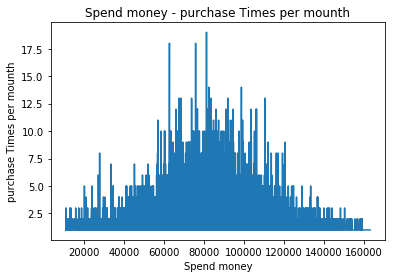

In [172]:
    train_x=[]
    train_y=[]
    train_tag=[]
    for item in train:
        train_x.append([item[0]])
        train_y.append([item[1]])
        train_tag.append([item[2]])
    plt.plot(train_x,train_y)
    plt.title('Spend money - purchase Times per mounth')
    plt.ylabel('purchase Times per mounth')
    plt.xlabel('Spend money')
    plt.show()

In [173]:
    clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(200,))
    clf.fit(train_x,train_tag)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [174]:
    print("Please insert the Spend amount in euroes :")
    money=int(input())
    money=np.matrix(money)
    y_pred = clf.predict(money)  
    print('this customer will purchase {0} times per mounth'.format(y_pred[0]))

Please insert the Spend amount in euroes :
80000
this customer will purchase more than 17 times per mounth
